# Homework 3  | Classifying People 
### Assigned Friday, 6 Apr 2018  /  Due Monday, 16 Apr  2018

#### Goal:
Using unsupervised learning we're going to construct a classifer by examining individual language usage. Next we're going to use this classifier to predict the political affliation of a group of people. Finally, we're going to use this exercise to reflect, analyze, and explore how such practices both reify and challenge our contemporary understanding of community and the public discourse. 

More specifically, you're going to
1. Tokenize and get word counts for a set of tweets;
2. see how these twitter user accounts cluster based on word usage using PCA;
3. explore how word usage is (or isn't) a good proxy for political affliation for people in public office.

#### To do this homework, you will also need the following files (which are also provided in github with this homework):
1. 2016tweets.csv (which is 19 MB so be sure you have a good internet connection!) 
2. pol_aff.csv

## Homework Problems 
#### This assignment is to be done on your own. Provide your code to justify your answer to each question.  Be sure to rename this homework so that it includes your name. 

## Step 1: Getting Word Frequencies For All Words in each tweet

### question 1 [1 points]
Ingest the file 2016tweets.csv into pandas as a dataframe entitled "tweets". Note that each tweet is a row. (You can find this file in the github repo in the same folder as this homework.) 
  

In [31]:
import pandas as pd

tweets = pd.read_csv('2016tweets.csv')
tweets['created_at'] =  pd.to_datetime(tweets['created_at'])

tweets.tail()

,id,user_id,created_at,tweet_text
114671,702222217518698496,1.321432e+09,2016-02-23 20:03:17,"RT @DwightEvansPA: ""No one has gotten more don..."
114672,701569631874629634,1.321432e+09,2016-02-22 00:50:09,.@JoshShapiroPA is a proven reformer and he is...
114673,698157622470512640,1.321432e+09,2016-02-12 14:52:02,"""Wolf has the facts on his side. As he said in..."
114674,697112619791024128,1.321432e+09,2016-02-09 17:39:34,If Harrisburg doesn't stop playing games w/ th...
114675,688057856298475520,1.321432e+09,2016-01-15 17:59:11,"65,914 Pennsylvanians to Republican Leaders: P..."


### question 2 [4 points]
1. What day and time was the oldest tweet in the data set posted? Hint: use `tweets['created_at'].min()`.
2. What day and time was the most recent tweet in the data set posted?
3. How many *tweets* does the data set have? 
4. How many unique twitter users does the data set have? 


In [16]:
print("1. The oldest tweet in the data set:", tweets['created_at'].min())
print("2. Day and time of the most recent tweet", tweets['created_at'].max())
print("3. How many tweets?", tweets.shape[0], "tweets")
print("4. How many unique twitter users?", tweets['user_id'].nunique())

1. The oldest tweet in the data set: 2016-01-01 00:16:30
2. Day and time of the most recent tweet 2017-01-29 23:58:10
3. How many tweets? 114676 tweets
4. How many unique twitter users? 125


### question 3 [30 points]
Use *sklearn's CountVectorizer* to produce a table of word counts in which each tweet is a row and each word is a column. Name this table "wc".

For a simple example of using sklearn countvectorizer to produce a table like this, see below. Note that this example just uses three made-up tweets so that it's easier to see what's happening.  

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Here we list a few sample strings, where each 
# string can be considered one text. For the tweets 
# dataframe you'll to produce a list in which each tweet is one string.  
# The string "The animal is large" is text 0 below; the string
# "is is is" is text 1 below; etc.
three_tweets= ["The animal is large.", "is is is", "The can't"]

# create vectorizer 
cv = CountVectorizer()

# tokenize texts & get vocabulary
cv.fit(three_tweets) #note that the sklearn tokenizer turns "can't" into "can"

# create a dictionary where each word is given an index number.
# If you need to know what word a number represents, refer back to this dictionary
word_index = cv.vocabulary_
word_index

{'animal': 0, 'can': 1, 'is': 2, 'large': 3, 'the': 4}

In [18]:
# to find out what column number a particular word is, say, "animal" we can use 
word_index["animal"]

0

In [19]:
# generate a table of tweets vs words
word_counts =  cv.transform(three_tweets)

# and get the "shape" of this table like this:
word_counts.shape
# where the 3 rows are the three tweets and the 
# 5 columns are the 5 words in this corpus 

(3, 5)

In [20]:
# Finally, you can dump the word_counts table into an array
# where each row is a tweet, each column is a word type, and each
# element is a word token count (where each word is denoted by a number
# as defined in the word_index). For difference between word types and word tokens, 
# see "type-token distinction" in wikipedia.
wc = word_counts.toarray()
wc

array([[1, 0, 1, 1, 1],
       [0, 0, 3, 0, 0],
       [0, 1, 0, 0, 1]], dtype=int64)

You'll need to substitute the "three_texts" list with a list of all the tweets that appear in your data set.

#### Put your code for question 3 below:

In [20]:
# List of tweets in data set
filtered_tweets = tweets[tweets['tweet_text'].notnull()]
tweet_texts = list(filtered_tweets['tweet_text'])

cv = CountVectorizer()
cv.fit(tweet_texts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [39]:
word_index = cv.vocabulary_
word_counts = cv.transform(tweet_texts)
wc = word_counts.toarray()

## Step 2: Find word usage for each twitter account

### question 4 [20 points]
The table wc give us the word counts for all tweets, but what we really want is a table of word counts *for all twitter accounts in our data set* (i.e., word counts for all tweets for each account).  

Make a new table called "wc_accounts" where each row is a twitter account user and the columns are word token counts for unique word types. (Note 2:  In the dataframe "tweets", a "user_id" is provided for each tweet.) You'll probably want to generate wc_accounts using a for loop that 
1. adds all the word counts in all the tweets written by the same account 
2. writes these account word counts to a new row;
3. and then repeats for all twitter accounts in corpus. 

However, as usual, there's more than one way to do this. Do whatever way makes most sense to you.

#### Put your code for question 4 below: 

In [45]:
import numpy as np

user_tweets = filtered_tweets.groupby(['user_id'], as_index=False)
all_user_tweets = np.zeros(shape=(len(user_tweets), len(word_index)))

In [57]:
for i, (user, utweets) in enumerate(user_tweets,start=0):
    count_vec = cv.transform(utweets['tweet_text'])
    sum_vec = np.sum(count_vec.toarray(), axis=0)
    all_user_tweets[i,:] = sum_vec
    
print(all_user_tweets)

[[ 1. 10.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 ...
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [63]:
wc_accounts = all_user_tweets
print(wc_accounts.shape)

(125, 152347)


## Step 3: Perform PCA on wc_accounts

Now that we have wc_acounts, we'd like to plot this to see how all these accounts use language. But how plot this in two dimensions? Let's use a form of unsupervised learning called PCA, where each account (i.e., each row) represents one data point. This is effectivey the same as the PCA we performed on the Iris and Spearman data sets in lab 5. And we can plot our twitter account data in exactly in the same way we did then.   

However, we have one additional wrinkle in our task. It'd be helpful to know which political affliation each individual twitter account has. Fortunately, I have this data for you! In pol_aff.csv I have included user_ID and their respective political affliation. Use this csv to get the political association of each user account. Note that this file may include user_IDs that don't exist in your corpus of tweets so you'll need to selective add political affliation based on user IDs. 

### question 5 [25 points]
Perform PCA on individual user accounts using the data in wc_accounts. Plot this in 2 dimensions where each data point represents one twitter account. Color code each data point according to account political affliation, with red = republicans and blue = democrats. To make overlapping data points easier to see, reduce the opacity (i.e., the "alpha" parameter) to 0.3. 


#### Put your code for question 5 below:

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
import matplotlib 

pol_aff = pd.read_csv('pol_aff.csv')

user_groups = [uid for uid, unused_df in user_tweets]
user_groups = pd.DataFrame(np.array(user_groups).reshape(len(user_groups), 1), columns=['user_id'])

joined_users = pd.merge(user_groups, pol_aff, how='left', left_on='user_id', right_on='id')

affiliations = joined_users['affliation']
affiliations = np.asarray(affiliations)

In [154]:
pca_model = sklearnPCA(n_components=2)
pca_coordinates = pca_model.fit_transform(wc_accounts)

C:\Users\ivycn\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


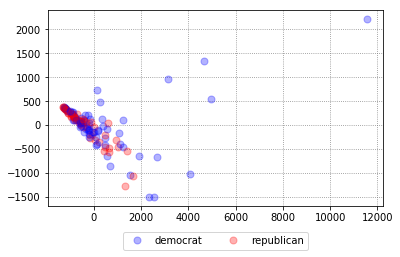

In [172]:
%matplotlib inline

for tweeter in range(0, len(pca_coordinates)):
    if affiliations[tweeter] == 'republican':
        col = 'red'
    elif affiliations[tweeter] == 'democrat':
        col = 'blue'
    else:
        continue
        
    plt.plot(pca_coordinates[tweeter, 0], pca_coordinates[tweeter, 1], 'o', markersize=7, alpha=0.3, color=col, label=label_of_tweeter[tweeter])

plt.legend()
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,  box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.25), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

## Step 4: Reflection: Choose your own adventure

## Provide an answer to either question 6 or question 7 but not both.


### question 6 [30 points, 350 words max] --  Post-Analysis Reflection: Using language to track political affliation
Write a short reflection about what you did in steps 1 - 3, specifically focusing on what assumptions are required for us to see language usage as a meaningful proxy for political affliation. The point is not to say what assumptions you agree with; but rather what would you have to believe to take the results of this investigation seriously. Are these assumptions tenable for inferring political affliation? Your answer will be graded on style, clarity, insight, and creativity.

Be sure to address the following questions in your answer:
1. Via visual inspection of your PCA plot in step 3, does our analysis of word usage effectively identify political affliations?  
2. What are some ways in which we could use *subsets of the vocabulary* as a better proxy for political affliation? How? What new problems might this cause? Are there other ways this proxy might be improved?
3. From step 1, you know what time period these tweets span. How might this influence the results of clustering by political affliation? How might you 
4. From lab 5, we saw that when applied to texts, PCA was sensitive to word length of texts being examined, i.e., longer texts tended to cluster together and shorter texts tended to cluster together. Without actually doing the analysis, how might you check to see if this was influencing your results?

Response:

From our PCA plot in step 3, using PCA to analyze how word usage identifies political affiliations was not effective. We see that most of the data points cluster around the same areas, with a few outliers that were affiliated with `democrat`. While performing this analysis, the assumptions we made were that the language used in tweets were indicative, expressive and clear in identifying political affiliation. However, Twitter tweets are often noisy and include emojis, hyperlinks, RTs (retweets), and may be too short to express political affiliation. In addition, non-political tweets would lead to inaccurate results. We can use subsets of the vocabulary by cleaning the data to remove stopwords, RTs, links, and other noise. In addition, we can choose the most discriminative words (such as those in the visualization here: https://archive.nytimes.com/www.nytimes.com/interactive/2012/09/06/us/politics/convention-word-counts.html#Leadership) and weigh them more heavily (so we don't just use the count of the word). Another idea might be to see who they tweeted at/in reply to. From step 1, we know that the tweets span approximately one year and one month. Since 2016 was the year of the last presidential election, tweets may express more political sentiment than in non-election years. However, we also may see that tweeters will address the platforms of both Democrats and Republicans. Since PCA is sentitive to word length such that longer texts cluster and shorter texts cluster, we could check this by looking for two clusters. In our plot, we see that most of the tweets cluster around the same area, so they are around the same length. 

### question 7 [30 points, 350 words max] --  Unsupervised learning proxies as a way of imagining communities
We looked at tweets in this assignment as a way of tracking political affiliation, but one could apply these and other unsupervised learning techniques to group people in other ways. In our case clustering (and possible subsequent classification or categorization) is produced by an examination of the similarity of word usage--even though there is no obvious or necessary connection between word usage and political affiliation. We could examine any set of features (not just words) to cluster groups of people, look for what particular features "produce" clusters that make sense to us (using a test set to check our clusters, such as we did above with Democrats and Republicans), and then use these particular features to group new people (i.e., those whose political affiliations we do not have data). 

Identify at least 4 problems with grouping people in this way. What are some of the assumptions required to group people using unsupervised learning as described in the above paragraph? Be sure to address the role of the corpus in constructing groups, and the various ethical considerations tied to this choice. You may wish to address the different contexts in which this grouping of people may occur. Feel free to cite any other examples of using unsupervised learning to construct groups of people to support your argument as well as any secondary literature you feel appropriate. Your answer will be graded on style, clarity, insight, and creativity.

Response:

Some of the assumptions required to group people in the unsupervised clustering method described are that they use the same language (not necessarily true on a social platform like Twitter), assuming that the same words are used across users, that the data is free from errors (on Twitter, we see noisy data such as abbreviations, slang, alternative spellings, etc.). In addition, there are questions of representation in the data. The Twitter corpus is noisy, tweet text data contains retweets and have length restrictions. In addition, clustering seems to require a critical mass of users that have similar word usage. In that regard, we are excluding or discounting "minorities" of the Twitterverse (ie. perhaps people who don't spend much time on social media, people without easy access to internet, demographic differences, etc.) One of the dangers of constructing groups of people is when the results are interpreted to stereotypes (ie. racial, socioeconomic, gender). The paper [_Real Men Don't Say "Cute"_ (Carpenter, et. 2016)](http://journals.sagepub.com/doi/10.1177/1948550616671998) looks at the issue of stereotypes and "aims to compare the extent to which a behavior is represented by a group to the extent that the exact same behavior is believed to be represented" on Twitter. They used labeled data on Twitter users in 4 studies: gender, age, education level, and political orientation and crowdsourced Some of their findings included that men were likely to be categorized as women if they expressed positive emotion or used second-person nouns, while women were more likely to be categorized as men if they talked about news or technology. The same issue could very well occur in unsupervised clustering of groups.